IndexError: too many indices for array

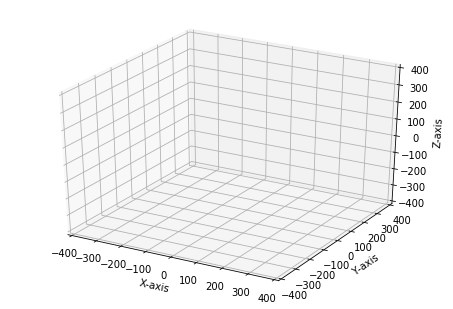

In [76]:
# coding: UTF-8

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt


# ファイル読み込み
d = genfromtxt("../MPUcalib/calib_data/11_5.csv", delimiter=",")

# グラフ作成
fig = pyplot.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(-400, 400)
ax.set_ylim(-400,400)
ax.set_zlim(-400, 400)

# 抽出条件設定
d1 = d
d2 = d
d3 = d


# グラフ描画
ax.plot(d1[:,0], d1[:,1], d1[:,2], "o", color="red", ms=4, mew=0.5)
pyplot.show()

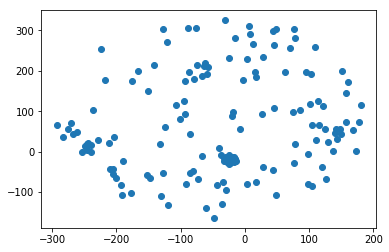

In [13]:
pyplot.plot(d1[:,0],d1[:,1],"o")

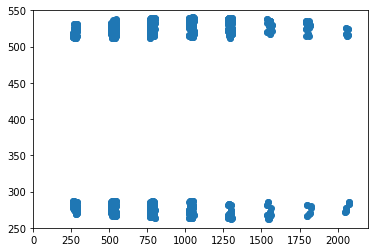

In [49]:
pyplot.xlim(0, 2200)
pyplot.ylim(250,550)
pyplot.plot(d1[:,0],d1[:,2],"o")

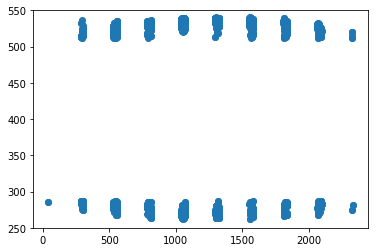

In [50]:
pyplot.ylim(250,550)
pyplot.plot(d1[:,1],d1[:,2],"o")

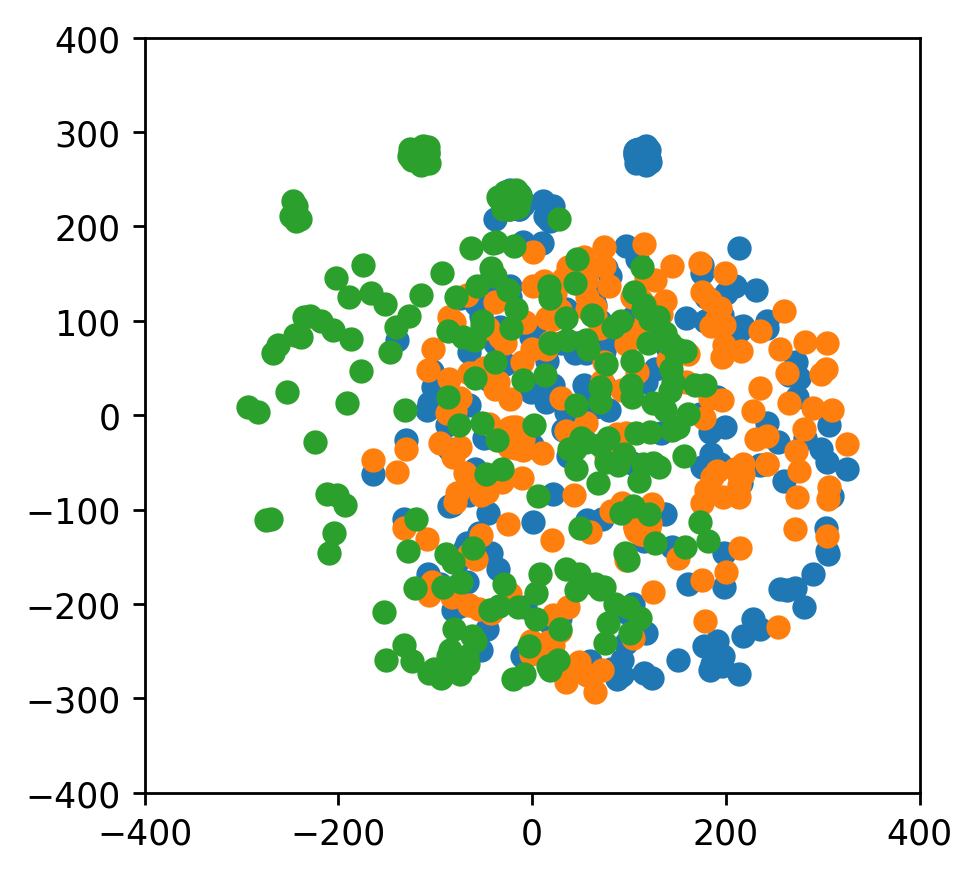

In [77]:
d0 = genfromtxt("../MPUcalib/calib_data/11_5_calib.csv", delimiter=",")
pyplot.figure(figsize=(4, 4), dpi=250)
# pyplot.axhline(55000, ls = "-.", color = "magenta")
# pyplot.axhline(55000, ls = "-.", color = "magenta")
# pyplot.axhline(54785, ls = "-.", color = "magenta")
pyplot.xlim(-400,400)
pyplot.ylim(-400,400)
pyplot.plot(d0[:,1],d0[:,2],"o")
pyplot.plot(d0[:,1],d0[:,0],"o")
pyplot.plot(d0[:,0],d0[:,2],"o")

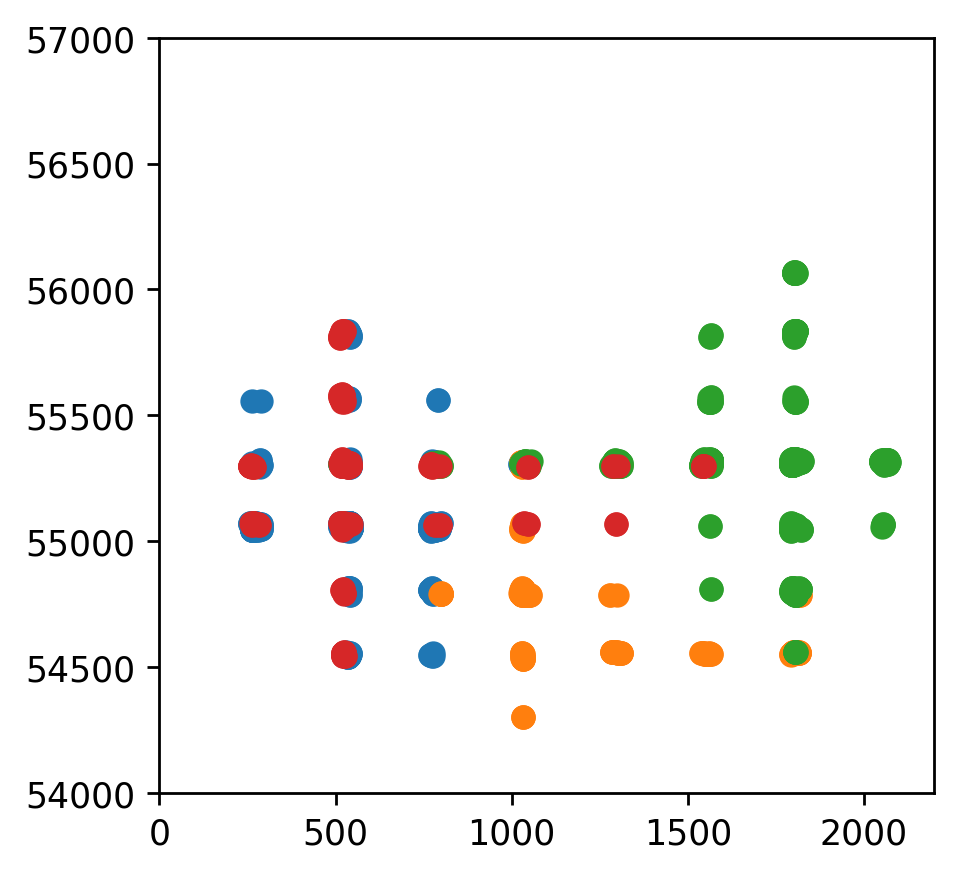

In [80]:
pyplot.figure(figsize=(4, 4), dpi=250)
pyplot.xlim(0,2200)
pyplot.ylim(54000,57000)
d0 = genfromtxt("../MPUcalib015.csv", delimiter=",")
pyplot.plot(d0[:,0],d0[:,1],"o")
d1 = genfromtxt("../MPUcalib80.csv", delimiter=",")
pyplot.plot(d1[:,0],d1[:,1],"o")
d2 = genfromtxt("../MPUcalib180.csv", delimiter=",")
pyplot.plot(d2[:,0],d2[:,1],"o")
d3 = genfromtxt("../MPUcalib0.csv", delimiter=",")
pyplot.plot(d3[:,0],d3[:,1],"o")


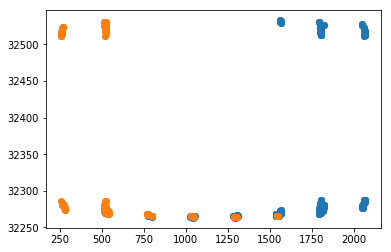

In [81]:
d2 = genfromtxt("../MPUcalib180.csv", delimiter=",")
pyplot.plot(d2[:,0],d2[:,2],"o")
d3 = genfromtxt("../MPUcalib0.csv", delimiter=",")
pyplot.plot(d3[:,0],d3[:,2],"o")

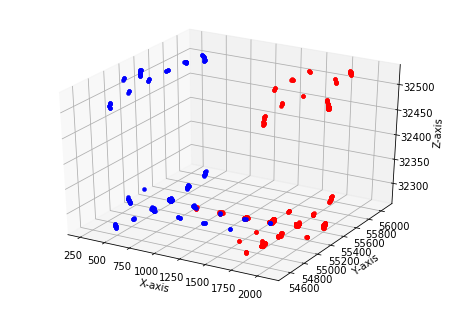

In [91]:
# coding: UTF-8

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt


# ファイル読み込み
d = genfromtxt("../MPUcalib.csv", delimiter=",")

# グラフ作成
fig = pyplot.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定


# グラフ描画
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="red", ms=4, mew=0.5)
ax.plot(d3[:,0], d3[:,1], d3[:,2], "o", color="blue", ms=4, mew=0.5)
pyplot.show()

In [89]:
min(d2[:,1]),min(d3[:,1])

(54558.0, 54543.0)

In [1]:
import cv2
import os

def save_frame_camera_key(device_num, dir_path, basename, ext='jpg', delay=1, window_name='frame'):
    cap = cv2.VideoCapture(device_num)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    n = 0
    while True:
        ret, frame = cap.read()
        cv2.imshow(window_name, frame)
        key = cv2.waitKey(delay) & 0xFF
        if key == ord('c'):
            cv2.imwrite('{}_{}.{}'.format(base_path, n, ext), frame)
            n += 1
        elif key == ord('q'):
            break

            
    cv2.destroyWindow(window_name)


save_frame_camera_key(0, './img', 'camera_capture')

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [3]:
# -*- coding: UTF-8 -*-
import cv2

if __name__ == '__main__':

    # 画像の読み込み
    img_src1 = cv2.imread("./img/camera_capture_0.jpg", 1)
    img_src2 = cv2.imread("./img/camera_capture_1.jpg", 1)

    fgbg = cv2.bgsegm.createBackgroundSubtractorMOG2()

    fgmask = fgbg.apply(img_src1)
    fgmask = fgbg.apply(img_src2)

    # 表示
    cv2.imshow('frame',fgmask)

    # 検出画像
    bg_diff_path  = './diff.jpg'
    cv2.imwrite(bg_diff_path,fgmask)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

AttributeError: module 'cv2.bgsegm' has no attribute 'createBackgroundSubtractorMOG2'

In [ ]:
import cv2
import numpy as np
 
#画像の読み込み
I1 = cv2.imread('./img/camera_capture_0.jpg', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('./img/camera_capture_1.jpg', cv2.IMREAD_GRAYSCALE)
I3 = cv2.imread('./img/camera_capture_2.jpg', cv2.IMREAD_GRAYSCALE)
 
 
#絶対値の求めたのち、背景差分を求める
img_diff1 = cv2.absdiff(I2,I1)
img_diff2 = cv2.absdiff(I3,I2)
 
 
#論理積を算出するには、bitwise_and()関数
Im = cv2.bitwise_and(img_diff1, img_diff2)
 
 
#二値化処理
img_th = cv2.threshold(Im, 10, 255,cv2.THRESH_BINARY)[1]
 
#膨張処理・収縮処理を施してマスク画像を生成
operator = np.ones((3,3), np.uint8)
img_dilate = cv2.dilate(img_th, operator, iterations=4)
img_mask = cv2.erode(img_dilate,operator,iterations=4)
 
#マスク画像を使って対象を切り出す
img_dst = cv2.bitwise_and(I3, img_mask)
 
#表示
cv2.imshow("Show BACKGROUND SUBSTRACTION image",img_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
 
#「背景」となる画像の取り込み（グレースケール）
img_src01 = cv2.imread("./img/camera_capture_0.jpg", 0)
 
#「差分」をもった画像の取り込み（グレースケール）
img_src02 = cv2.imread("./img/camera_capture_3.jpg", 0)
 
#「背景差分」計算用オブジェクトの作成　
bgObj = cv2.bgsegm.createBackgroundSubtractorMOG()
 
#差分となっている「前景領域」に対してマスクをかける
fgmask = bgObj.apply(img_src01)
fgmask = bgObj.apply(img_src02)
 
#画面に表示
cv2.imshow('frame', fgmask)
 
#「差分」画像のファイル名
bg_diff_path = "./diff.jpg"
 
#「差分」画像の保存
cv2.imwrite(bg_diff_path, fgmask)
 
#「キー」が押されるまで画面を表示
cv2.waitKey(0)
 
#作成した画面をすべて破棄
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#球面フィッティング
def SS_fit(data) : 
    #x,y,z要素取り出し
    x = data[:,[0]]
    y = data[:,[1]]
    z = data[:,[2]]

    #データの長さを格納（n = Σ1)    
    n = len(x)
    
    #それぞれの要素の二乗を求める
    x2 = np.power(x,2)
    y2 = np.power(y,2)
    z2 = np.power(z,2)


    #違う要素との積を求める
    xy = x*y
    xz = x*z
    yz = y*z

    #右辺の数値用
    E = -x*(x2+y2+z2)
    F = -y*(x2+y2+z2)
    G = -z*(x2+y2+z2)
    H =   -(x2+y2+z2)
    


    #要素の総和に変換
    x = np.sum(x)
    y = np.sum(y)
    z = np.sum(z)

    x2 = np.sum(x2)
    y2 = np.sum(y2)
    z2 = np.sum(z2)

    xy = np.sum(xy)
    xz = np.sum(xz)
    yz = np.sum(yz)    

    E = np.sum(E)
    F = np.sum(F)
    G = np.sum(G)
    H = np.sum(H)

    #左辺の4×4行列を作る
    K = np.array([  [x2,xy,xz,x],
                    [xy,y2,yz,y],
                    [xz,yz,z2,z],
                    [x,y,z,n]])
    
    #右辺の4×1行列を作る
    L = np.array([E,F,G,H])

    #A,B,C,Dの行列を計算
    P = np.dot(np.linalg.inv(K),L)

    A = P[0]
    B = P[1]
    C = P[2]
    D = P[3]

    #中心座標と半径に変換
    x0 = (-1/2)* A
    y0 = (-1/2)* B
    z0 = (-1/2)* C
    r  = pow(pow(x0,2)+pow(y0,2)+pow(z0,2)-D,1/2)
    
    return np.array([x0,y0,z0,r])



#メイン

#csvファイル読み込み
Mag = np.loadtxt("../MPUcalib/calib_data/11_5.csv", delimiter=',')

#x,y,z軸分離
MagX = Mag[:,[0]]
MagY = Mag[:,[1]]
MagZ = Mag[:,[2]]

#3Dプロット
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(MagX, MagY, MagZ)
plt.show()

#球面フィッティング
S = SS_fit(Mag)

#球面フィッティング後の4変数を表示
print(S)

#中心を0に移動
MagX = MagX - S[0]
MagY = MagY - S[1]
MagZ = MagZ - S[2]

#3Dプロット(中心0)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(MagX, MagY, MagZ)
plt.show()

array([[-164.616841],
       [-157.616841],
       [-162.616841],
       [-161.616841],
       [-161.616841],
       [-161.616841],
       [-166.616841],
       [  19.383159],
       [ 131.383159],
       [-141.616841],
       [ -38.616841],
       [  -6.616841],
       [ -10.616841],
       [-187.616841],
       [   6.383159],
       [-127.616841],
       [ 160.383159],
       [  38.383159],
       [  63.383159],
       [ 204.383159],
       [ -37.616841],
       [ 196.383159],
       [ 158.383159],
       [ 100.383159],
       [ 193.383159],
       [  74.383159],
       [ 186.383159],
       [ -11.616841],
       [ 187.383159],
       [ 126.383159],
       [ 183.383159],
       [ 109.383159],
       [ 181.383159],
       [ 128.383159],
       [ -45.616841],
       [ 152.383159],
       [ 219.383159],
       [ 212.383159],
       [ 222.383159],
       [ 232.383159],
       [ 224.383159],
       [ 230.383159],
       [  67.383159],
       [ 197.383159],
       [  51.383159],
       [ 1

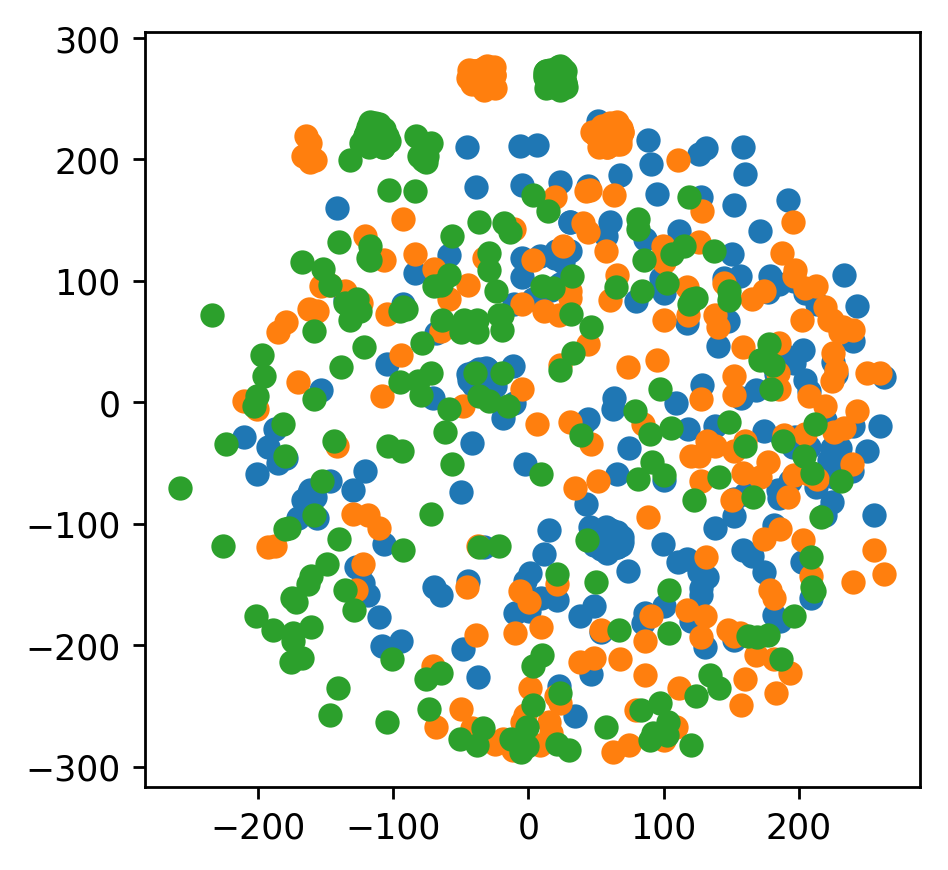

In [27]:
# d0 = genfromtxt("../MPUcalib/calib_data/11_5.csv", delimiter=",")
pyplot.figure(figsize=(4, 4), dpi=250)
# pyplot.axhline(55000, ls = "-.", color = "magenta")
# pyplot.axhline(55000, ls = "-.", color = "magenta")
# pyplot.axhline(54785, ls = "-.", color = "magenta")
# pyplot.xlim(-400,400)
# pyplot.ylim(-400,400)
pyplot.plot(MagX,MagY,"o")
pyplot.plot(MagX,MagZ,"o")
pyplot.plot(MagY,MagZ,"o")


In [35]:
np.arctan(MagY/MagX) / np.pi * 360

array([[  53.43501285],
       [  52.57521212],
       [  49.43564065],
       [  50.28707873],
       [  50.28707873],
       [  47.94094483],
       [  51.77321947],
       [ 161.51926731],
       [ 115.72618935],
       [ -97.0264979 ],
       [-155.40410643],
       [-176.4100875 ],
       [-165.09146136],
       [  13.28959441],
       [ 176.55310613],
       [  93.58255331],
       [  99.10799934],
       [-155.37499315],
       [   5.67821979],
       [  10.14582704],
       [ 161.08816035],
       [  18.59110537],
       [ 105.98998171],
       [-118.23870549],
       [ -37.08075628],
       [ -53.94686331],
       [ -87.95816674],
       [-137.84798523],
       [ -17.50934873],
       [ -95.79415673],
       [  14.38563397],
       [  -0.89744953],
       [ -58.15180555],
       [  12.57327203],
       [-155.50507592],
       [  93.55478398],
       [ -45.882242  ],
       [ -36.41394791],
       [ -24.28957675],
       [ -24.21793499],
       [ -19.15288241],
       [ -18.662

In [70]:
a = MagX**2 + MagY ** 2 + MagZ ** 2 < 250.08999721 ** 2

In [71]:
MagX_R = MagX[a.flatten()]
MagY_R = MagY[a.flatten()]
MagZ_R = MagZ[a.flatten()]

In [72]:
Mag_R = np.array([[MagX[a.flatten()][i][0],MagY[a.flatten()][i][0],MagZ[a.flatten()][i][0]] for i in range(len(MagX[a.flatten()]))])

In [73]:
S = SS_fit(Mag_R)

In [74]:
S

array([ 15.63767947, -17.47074638,  -6.32247511, 207.15009013])

In [1]:
#中心を0に移動
MagX_R = MagX_R - S[0]
MagY_R = MagY_R - S[1]
MagZ_R = MagZ_R - S[2]

#3Dプロット(中心0)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(MagX_R, MagY_R, MagZ_R)
plt.show()

NameError: name 'MagX_R' is not defined